# Types of Mushroom 

In this notebook, I have explored a dataset that consists of mushrooms along with various characteristics of the same. I have also designed an ANN that can help us to know whether the mushroom is edible or not based on its characteristics.

# Attribute Information
These can be reffered to read the data:

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Data Exploration
After collecting the dataset, we have to clean it and make it usable.

In [1]:
#Let's first import the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#Let's load the dataset
df = pd.read_csv("Mushrooms.csv")
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [3]:
#Let's check some statistics 
print(df.info())
print(df['class'].value_counts())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Data Visualisation
Now that the Data has been loaded and cleaned, we can try to get an idea of how the various features of the mushroom impact its edibility.

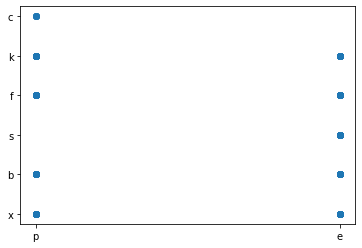

In [4]:
plt.scatter(df['class'], df['cap-shape'])
plt.show()

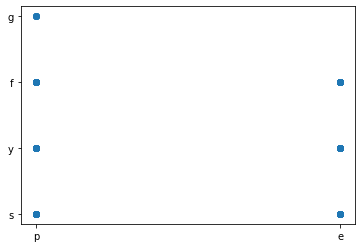

In [5]:
plt.scatter(df['class'], df['cap-surface'])
plt.show()

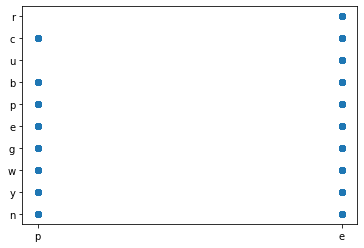

In [6]:
plt.scatter(df['class'], df['cap-color'])
plt.show()

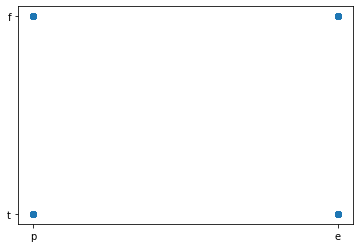

In [7]:
plt.scatter(df['class'], df['bruises'])
plt.show()

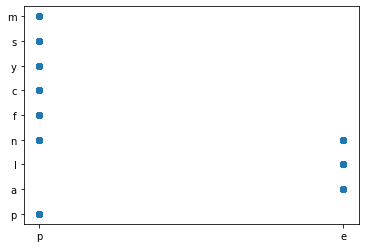

In [8]:
plt.scatter(df['class'], df['odor'])
plt.show()

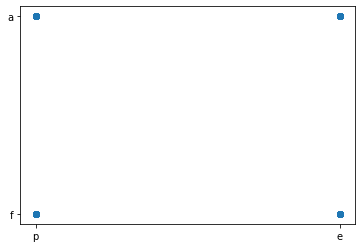

In [9]:
plt.scatter(df['class'], df['gill-attachment'])
plt.show()

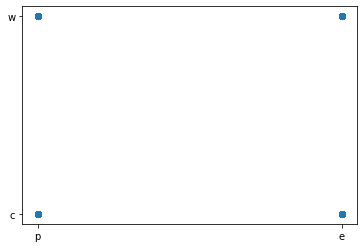

In [10]:
plt.scatter(df['class'], df['gill-spacing'])
plt.show()

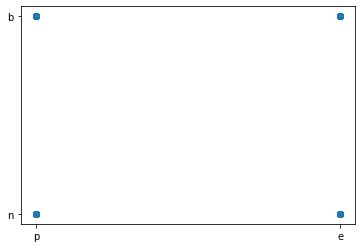

In [11]:
plt.scatter(df['class'], df['gill-size'])
plt.show()

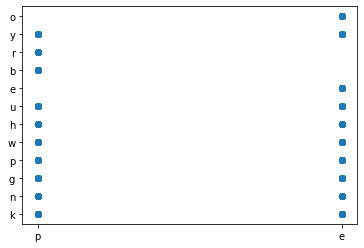

In [12]:
plt.scatter(df['class'], df['gill-color'])
plt.show()

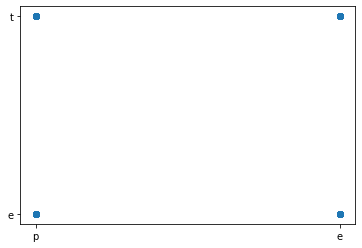

In [13]:
plt.scatter(df['class'], df['stalk-shape'])
plt.show()

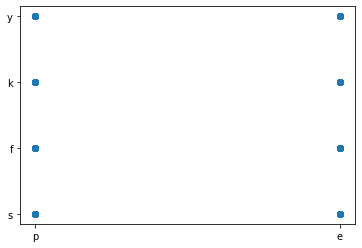

In [14]:
plt.scatter(df['class'], df['stalk-surface-above-ring'])
plt.show()

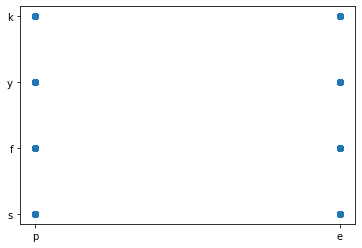

In [15]:
plt.scatter(df['class'], df['stalk-surface-below-ring'])
plt.show()

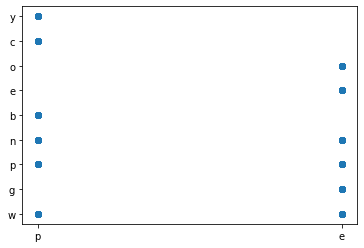

In [16]:
plt.scatter(df['class'], df['stalk-color-above-ring'])
plt.show()

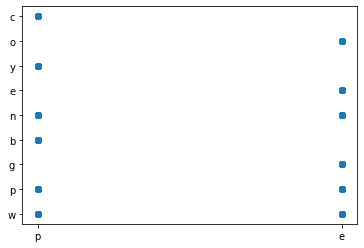

In [17]:
plt.scatter(df['class'], df['stalk-color-below-ring'])
plt.show()

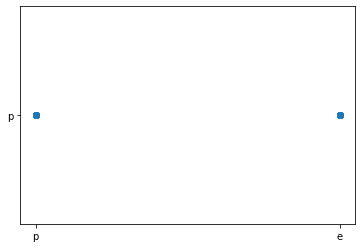

In [18]:
plt.scatter(df['class'], df['veil-type'])
plt.show()

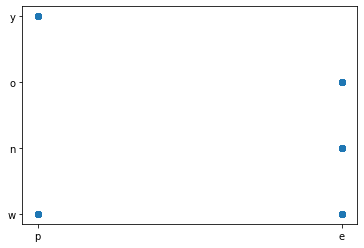

In [19]:
plt.scatter(df['class'], df['veil-color'])
plt.show()

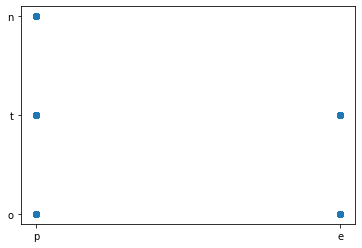

In [20]:
plt.scatter(df['class'], df['ring-number'])
plt.show()

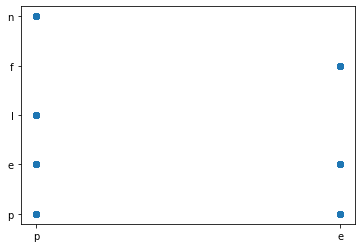

In [21]:
plt.scatter(df['class'], df['ring-type'])
plt.show()

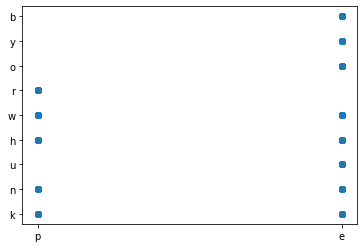

In [22]:
plt.scatter(df['class'], df['spore-print-color'])
plt.show()

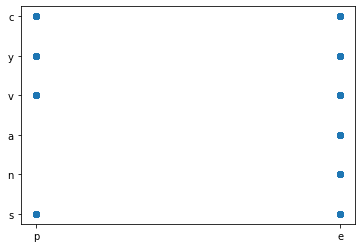

In [23]:
plt.scatter(df['class'], df['population'])
plt.show()

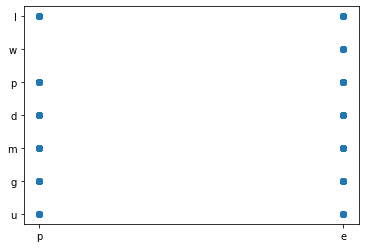

In [24]:
plt.scatter(df['class'], df['habitat'])
plt.show()

# Modelling

Now that we have plotted the input criteria against the output classes and have got an idea of the relevant input classes, we can design a model(In this case a Neural Network) that can predict whether a mushroom is edible or not based on its physical features and other factors.

In [25]:
#Convert the strings to numbers
label_encode = {'class': {'e':0, 'p':1},'cap-shape': {'b':0, 'c':1, 'x':2, 'f':3, 'k':4, 's':5},'cap-surface':{'f':0,'g':1,'y':2,'s':3}, 'cap-color':{'n':0,'b':1,'c':2,'g':3,'r':4,'p':5,'u':6,'e':7,'w':8,'y':9}, 'bruises':{'t':0,'f':1}, 'odor':{'a':0,'l':1,'c':2,'y':3,'f':4,'m':5,'n':6,'p':7,'s':8}, 'gill-attachment':{'a':0,'d':1,'f':2,'n':3}, 'gill-spacing':{'c':0,'w':1,'d':2}, 'gill-size':{'b':0,'n':1},'gill-color':{'k':0,'n':1,'b':2,'h':3,'g':4,'r':5,'o':6,'p':7,'u':8,'e':9,'w':10,'y':11},'stalk-root':{'b':0,'c':1,'u':2,'e':3,'z':4,'r':5,'?':6},'stalk-shape':{'e':0,'t':1},'stalk-surface-above-ring':{'f':0,'y':1,'k':2,'s':3}, 'stalk-surface-below-ring':{'f':0,'y':1,'k':2,'s':3},'stalk-color-above-ring':{'n':0,'b':1,'c':2,'g':3,'o':4,'p':5,'e':6,'w':7,'y':8}, 'stalk-color-below-ring':{'n':0,'b':1,'c':2,'g':3,'o':4,'p':5,'e':6,'w':7,'y':8},'veil-type':{'p':0,'u':1}, 'veil-color':{'n':0,'o':1,'w':2,'y':3}, 'ring-number':{'n':0,'o':1,'t':2}, 'ring-type':{'c':0,'e':1,'f':2,'l':3,'n':4,'p':5,'s':6,'z':7}, 'spore-print-color':{'k':0,'n':1,'b':2,'h':3,'r':4,'o':5,'u':6,'w':7,'y':8}, 'population':{'a':0,'c':1,'n':2,'s':3,'v':4,'y':5}, 'habitat':{'g':0,'l':1,'m':2,'p':3,'u':4,'w':5,'d':6}}
df.replace(label_encode,inplace=True)

#Let's extract the data values that are necessary
x_values = df[['class', 'cap-shape','cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring', 'stalk-surface-below-ring','stalk-color-above-ring', 'stalk-color-below-ring','veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']]
y_values = df['class']
y_values = to_categorical(y_values)

In [26]:
#Let's now prepare the training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.25,random_state=10)

print("Number of rows in x_train:", x_train.shape[0])
print("Number of rows in x_test:", x_test.shape[0])
print("Number of rows in y_train:", y_train.shape[0])
print("Number of rows in y_test:", y_test.shape[0])

Number of rows in x_train: 6093
Number of rows in x_test: 2031
Number of rows in y_train: 6093
Number of rows in y_test: 2031


In [27]:
#Let's create our Neural Network
ANN = Sequential()
ANN.add(Dense(46,input_dim=23,activation='relu'))
ANN.add(Dense(46,activation='relu'))
ANN.add(Dense(2,activation='softmax'))
ANN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

ANN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 46)                1104      
_________________________________________________________________
dense_1 (Dense)              (None, 46)                2162      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 94        
Total params: 3,360
Trainable params: 3,360
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Let's train our model
ANN.fit(x_train,y_train,epochs=5,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/5
191/191 [==============================] - 2s 9ms/step - loss: 0.3632 - accuracy: 0.8467 - val_loss: 0.0533 - val_accuracy: 0.9887
Epoch 2/5
191/191 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9935 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 3/5
191/191 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4/5
191/191 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/5
191/191 [==============================] - 0s 2ms/step - loss: 9.5746e-04 - accuracy: 1.0000 - val_loss: 5.8364e-04 - val_accuracy: 1.0000


# Evaluation
We can see that our model has an accuracy of 100%. Now let's evaluate our model using Confusion Matrices and Heatmaps.

Confusion Matrix:
[[1072    0]
 [   0  959]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

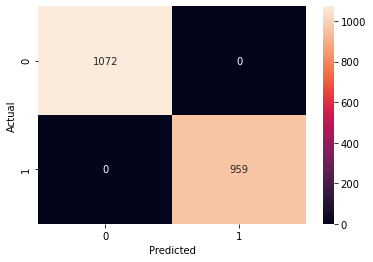

In [ ]:
#Let's make the model predict the mushroom class for the already existing dataset 
y_predict = ANN.predict(x_test)

predicted_class = []
actual_class = []
for ii in range(0,y_predict.shape[0]):
    predicted_class.append(np.argmax(y_predict[ii,:]))
for ii in range(0,y_test.shape[0]):
    actual_class.append(np.argmax(y_test[ii,:]))   
    
#Let's make a Heatmap of our model's prediction
print('Confusion Matrix:') 
print(confusion_matrix(actual_class, predicted_class))  

#Let's make a Heatmap of our model's prediction
testing = pd.DataFrame()
testing['Actual'] = actual_class
testing['Predicted'] = predicted_class
freq = pd.crosstab(testing.Actual,testing.Predicted)
sns.heatmap(freq,annot=True,fmt="d")

From the Confusion Matrix and heatmap, we can see that our model has predicted all 2031 out of 2031 values correctly that means it has a 100% Evaluation Accuracy. This is the trained model that is ready for execution.